In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Parte 2.4**

Aunque tu amigo va a renovar su modelo de datos en base a lo que le digas, necesita
proyectar la demanda de frutas para el año que viene en base a los datos que obtuvo del año anterior. Su
idea era cargar los datos en la misma base de datos de la aplicación y correr ahí consultas de analítica.
1. Para esta parte se pide que le respondas a tu amigo por que lo quiere hacer es mala idea y justifiques
por qué hay que cargar los datos en un Data Warehouse, y hacer la analitica ahí.

Entiendo que mi amigo necesitara tomar decisiones empresariales dado ciertos análisis, por lo necesita de  información que se presente de forma eficiente, que sea más precisa y detallada y correr consultas directamente en la base de datos de la aplicación  afectaría al rendimiento  del sistema, especialmente si la base de datos está siendo utilizada activamente para otras operaciones de la aplicación lo que podría causar por ejemplo la interrupción del servicio para los usuarios, por lo que  cargar los datos en un Data Warehouse es preferible por varias razones, partiendo por que están optimizados para consultas analíticas complejas sobre conjuntos de datos grandes (como podría llegar a ser los de una empresa)dando tiempos de respuesta rápidos incluso para consultas complejas, a diferencia de las bases de datos de aplicaciones que suelen estar diseñadas para manejar transacciones en tiempo real y no están optimizadas para consultas analíticas más complejas sobre grandes volúmenes de datos. Tambien mantienen un historial completo de los datos a lo largo del tiempo, lo que es esencial para el análisis de tendencias y/o la generación de informes comparativos a lo largo de diferentes períodos, como los que se necesitarían en el área de ventas. Otra razón, es que permite integrar datos de múltiples fuentes y formatos en un único repositorio centralizado,esto facilita la combinación y análisis de datos de diferentes áreas de la empresa.



**Parte 2.4**


1. El número de unidades vendidas el mes de cada fruta, separado por región.
2. El dinero acumulado que ha entrado a la tienda.
3. La distribución del dinero que gastan los clientes en la tienda. Hazlo de forma que sea un gráfico que se entienda (por ejemplo, algunos boxplot para distintos meses o grupos de meses).

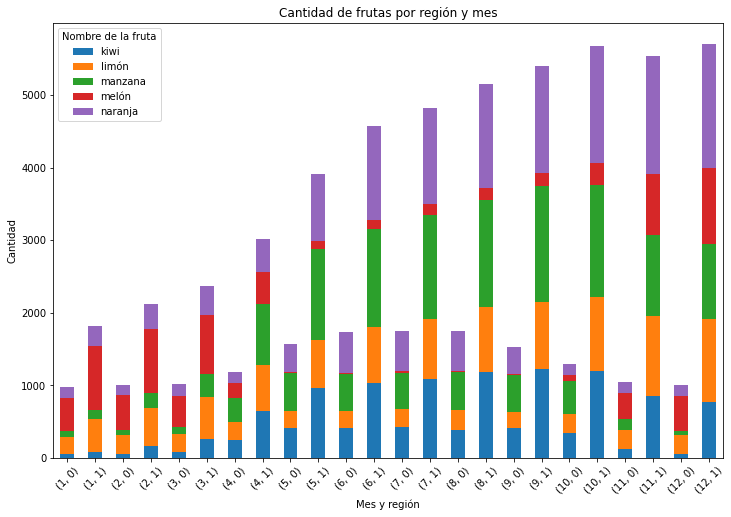

In [12]:

info_compras =  pd.read_csv("ordenes_compras.csv")
frutas = pd.read_csv("frutas.csv")
region = pd.read_csv("region.csv")

# Diccionario para mapear fruta_id con el nombre de la fruta y  id_region con su nombre
mapeo_region = dict(zip(region['id_region'], region['nombre']))
mapeo_frutas = dict(zip(frutas['id_fruta'], frutas['nombre']))

# Mapear id_fruta con el nombre de la fruta, lo mismo para id_region 
info_compras['nombre_fruta'] = info_compras['id_fruta'].map(mapeo_frutas)
info_compras["region"] = info_compras['id_region'].map(mapeo_region)

# Conteo de la cantidad de frutas por nombre y por id_region
info_compras['fecha'] = pd.to_datetime(info_compras['fecha'])
info_compras["mes"] = info_compras['fecha'].dt.month
conteo_por_mes_region_fruta = info_compras.groupby(['mes', 'id_region', 'nombre_fruta']).size().unstack(fill_value=0)


conteo_por_mes_region_fruta.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cantidad de frutas por región y mes')
plt.xlabel('Mes y región')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Nombre de la fruta')
plt.show()

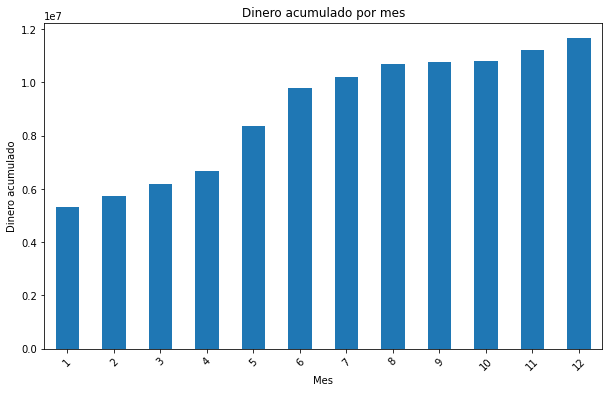

In [14]:
# Mapear fruta_id con el precio de la fruta en el DataFrame frutas
mapeo_precios = dict(zip(frutas['id_fruta'], frutas['precio']))
info_compras['precio_fruta'] = info_compras['id_fruta'].map(mapeo_precios)

# Calcular el valor total por fruta multiplicando la cantidad vendida por su precio
info_compras['valor_total'] = info_compras['cantidad'] * info_compras['precio_fruta']

# Calcular el dinero acumulado por mes sumando el valor total de todas las frutas vendidas en ese mes
dinero_acumulado_por_mes = info_compras.groupby('mes')['valor_total'].sum()

# gráfico del dinero acumulado por mes
dinero_acumulado_por_mes.plot(kind='bar', figsize=(10, 6))
plt.title('Dinero acumulado por mes')
plt.xlabel('Mes')
plt.ylabel('Dinero acumulado')
plt.xticks(rotation=45)
plt.show()

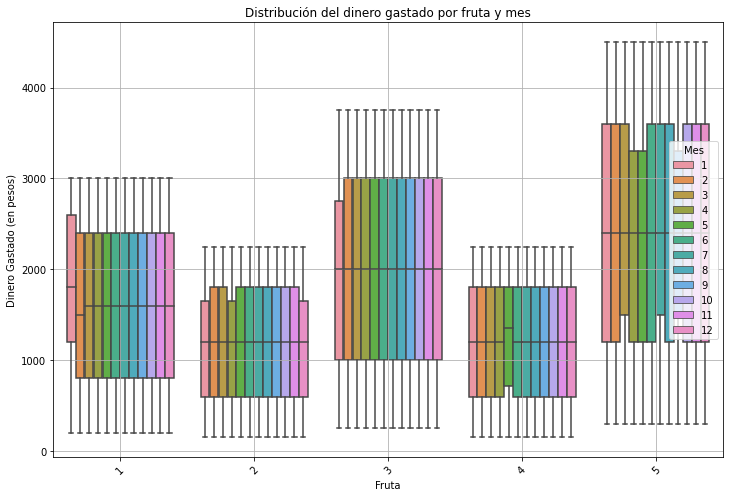

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt



mapeo_precios = dict(zip(frutas['id_fruta'], frutas['precio']))
info_compras['precio_fruta'] = info_compras['id_fruta'].map(mapeo_precios)

# Calcular el dinero total gastado por cada cliente en cada mes
info_compras['dinero_total'] = info_compras['cantidad'] * info_compras['precio_fruta']


plt.figure(figsize=(12, 8))
sns.boxplot(data=info_compras, x='id_fruta', y='dinero_total', hue='mes', dodge=True)
plt.title('Distribución del dinero gastado por fruta y mes')
plt.xlabel('Fruta')
plt.ylabel('Dinero Gastado (en pesos)')
plt.xticks(rotation=45)  #legibilidad
plt.legend(title='Mes')
plt.grid(True)
plt.show()

4. ¿Que región crees que va en crecimiento y va a aumentar su demanda el siguiente año?<br>
La región 2 según el gráfico 1 se nos muestra como  notoriamente presenta más ventas que la región 1, especialmente a medida que pasa el tiempo, por lo que podemos inferir que va en crecimiento, además la naranja es la mas demandada a lo largo del tiempo.

5. ¿Puedes ver alguna relación entre la venta de las frutas?

**Comparación entre regiones**:
   - En general, las ventas de frutas en la región 2 son considerablemente más altas que en la región 1 en la mayoría de meses.

**Tendencias estacionales**:
   - Se observa un aumento en las ventas de frutas en ambas regiones durante los meses de invierno - otoño, lo que sugiere una mayor demanda  de la fruta en esa época del año, especialmente en las naranjas, y esto tiene que ver con los meses en que empieza la temporada de esta fruta .
   - En contraste, los meses de calor despues de invierno muestran ventas más bajas en la región 1, a diferencia de la región que casi no presenta baja de ventas en el segundo semestre, pero si se disminuye un poco la venta de manzanas

**Comparación de ventas de frutas**:
   - La naranja  es consistentemente las más vendida en ambas regiones a lo largo del año.


**Identificación de picos y valles de ventas**:
   - Se observan picos de ventas en las dos regiones durante los meses de octubre y dcembre para la región 2, y para la region 1 de mayo a octubre.
   - Los meses de mayo y diciembre muestran los valles más bajos de ventas en la región 1 , mientras que para la región 2, este es en enero y marzo.

6. Tu amigo tiene una predicción de la demanda del kiwi para el próximo año en distintas regiones. ¿Como lo harías para predecir la venta de una o más frutas en base a esa predicción<br>


Para predecir la demanda de una o más frutas en base a la predicción de mi amigo para el próximo año, utilizaría un enfoque de modelado predictivo. Por lo que recopilaría los datos históricos de ventas de las frutas de interés, en este caso el kiwi, en las distintas regiones durante un período de tiempo largo, datos que serían para entrenar un modelo predictivo.

Como modelo,optaría por utilizar un modelo de regresión lineal debido a su capacidad para modelar relaciones lineales entre variables. En este caso, la variable independiente serían los datos históricos de ventas de frutas por mes, y la variable dependiente sería la predicción de la demanda de kiwi o de otras frutas para el próximo año.

Una vez que se ha recopilado y limpiado adecuadamente el conjunto de datos, dividimos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utilizaría para ajustar los coeficientes del modelo de regresión lineal, mientras que el conjunto de prueba se utilizaría para evaluar la precisión y la generalización del modelo, luego se valida el modelo utilizando métricas de evaluación para garantizar que la predicción sea lo más precisa posible.

Además, se podrían incluir otros factores (se necesitaría de otra investigación) que podrían influir en la demanda de frutas, como el clima, la estacionalidad, las tendencias del mercado, entre otros. Estos factores podrían integrarse en el modelo como variables adicionales para mejorar su precisión y capacidad predictiva.

